<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing\_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


***


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [4]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [5]:
Y = data['Class'].to_numpy()
Y = pd.DataFrame(Y)
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       90 non-null     int64
dtypes: int64(1)
memory usage: 848.0 bytes


In [6]:
X = np.asarray(X)
Y = np.asarray(data['Class'])

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [7]:
# students get this 
transform = preprocessing.StandardScaler()

In [8]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


we can see we only have 18 test samples.


In [10]:
#Y_test.shape
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (72, 83) (72,)
Test set: (18, 83) (18,)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,Y_train)
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat_prob


array([[0.79746633, 0.20253367],
       [0.78790199, 0.21209801],
       [0.28277426, 0.71722574],
       [0.30274805, 0.69725195],
       [0.45747562, 0.54252438],
       [0.30347997, 0.69652003],
       [0.44994273, 0.55005727],
       [0.4043785 , 0.5956215 ],
       [0.5057723 , 0.4942277 ],
       [0.29926394, 0.70073606],
       [0.29480119, 0.70519881],
       [0.60167123, 0.39832877],
       [0.76199291, 0.23800709],
       [0.30912914, 0.69087086],
       [0.38888893, 0.61111107],
       [0.41526825, 0.58473175],
       [0.49303312, 0.50696688],
       [0.29591834, 0.70408166]])

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [12]:
lr_parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [13]:
LR=LogisticRegression()

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [14]:
import warnings
warnings.filterwarnings("ignore")

LR_cv = GridSearchCV(LR,lr_parameters)
LR_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",LR_cv.best_params_)
print("accuracy :",LR_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8495238095238096


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [15]:
yhat=LR_cv.predict(X_test)

In [16]:
lr_best_grid = LR_cv.best_estimator_
LR_yhat = lr_best_grid.predict(X_test)
print('Accuracy Score:',accuracy_score(Y_test, LR_yhat))
print(LR_cv.best_score_)

Accuracy Score: 0.7222222222222222
0.8495238095238096


In [17]:
from sklearn.model_selection import cross_val_score
lr_val = cross_val_score(lr_best_grid, X=X_test, y=Y_test, cv=5)
print ('Nested LogReg GridSearch Score:', sum(lr_val)/5)

Nested LogReg GridSearch Score: 0.7


In [18]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

Lets look at the confusion matrix:


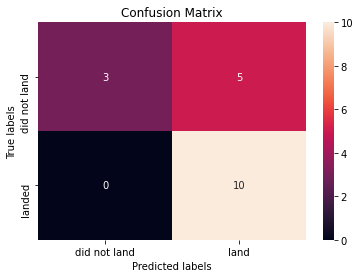

In [19]:
plot_confusion_matrix(Y_test, LR_yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


In [20]:
print (classification_report(Y_test, LR_yhat))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.67      1.00      0.80        10

    accuracy                           0.72        18
   macro avg       0.83      0.69      0.67        18
weighted avg       0.81      0.72      0.69        18



## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
svm_parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [54]:
svm_cv = GridSearchCV(svm, svm_parameters)
svm_cv.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 31.622776601683793, 'gamma': 1.0, 'kernel': 'sigmoid'}
accuracy : 0.6666666666666667


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [23]:
svm_best_grid = svm_cv.best_estimator_
svm_yhat = svm_best_grid.predict(X_test)
print('Accuracy Score:',accuracy_score(Y_test, svm_yhat))
print(svm_cv.best_score_)

Accuracy Score: 0.7777777777777778
0.8638095238095238


In [24]:
svm_val = cross_val_score(svm_best_grid, X=X_test, y=Y_test, cv=5)
print ('Support Vector Machine GridSearch Score:', sum(svm_val)/5)

Support Vector Machine GridSearch Score: 0.5833333333333333


We can plot the confusion matrix


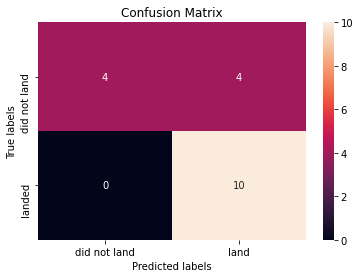

In [25]:
plot_confusion_matrix(Y_test, svm_yhat)

In [26]:
print (classification_report(Y_test, svm_yhat))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.71      1.00      0.83        10

    accuracy                           0.78        18
   macro avg       0.86      0.75      0.75        18
weighted avg       0.84      0.78      0.76        18



## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [27]:
tree_parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [28]:
tree_cv = GridSearchCV(tree, tree_parameters)
tree_cv.fit(X_train,Y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [29]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.9180952380952382


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [30]:
tree_best_grid = tree_cv.best_estimator_
tree_yhat = tree_best_grid.predict(X_test)
print('Accuracy Score:',accuracy_score(Y_test, tree_yhat))
print('Best Score:', tree_cv.best_score_)

Accuracy Score: 0.7222222222222222
Best Score: 0.9180952380952382


In [31]:
tree_val = cross_val_score(tree_best_grid, X=X_test, y=Y_test, cv=5)
print ('Nested K-Nearest Neighbor GridSearch Score:', sum(tree_val)/5)

Nested K-Nearest Neighbor GridSearch Score: 0.5


We can plot the confusion matrix


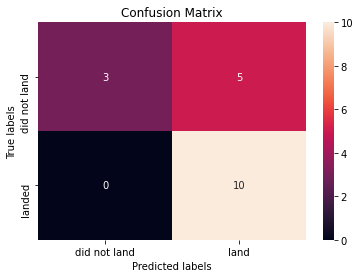

In [32]:
plot_confusion_matrix(Y_test, tree_yhat)

In [33]:
print (classification_report(Y_test, tree_yhat))

              precision    recall  f1-score   support

           0       1.00      0.38      0.55         8
           1       0.67      1.00      0.80        10

    accuracy                           0.72        18
   macro avg       0.83      0.69      0.67        18
weighted avg       0.81      0.72      0.69        18



## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [34]:
knn_parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [35]:
knn_cv = GridSearchCV(KNN, knn_parameters)
knn_cv.fit(X_train,Y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [36]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 1, 'p': 1}
accuracy : 0.8638095238095238


## TASK  11


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [37]:

print('Accuracy Score:',accuracy_score(Y_test, knn_yhat))
print('Best Score:',knn_cv.best_score_)

Accuracy Score: 0.7777777777777778
Best Score: 0.8638095238095238


In [38]:
knn_val = cross_val_score(knn_best_grid, X=X_test, y=Y_test, cv=5)
print ('Nested K-Nearest Neighbor GridSearch Score:', sum(knn_val)/5)

Nested K-Nearest Neighbor GridSearch Score: 0.6


We can plot the confusion matrix


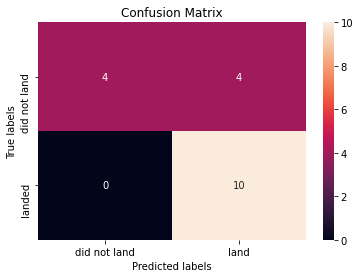

In [39]:
plot_confusion_matrix(Y_test, knn_yhat)

In [40]:
print (classification_report(Y_test, knn_yhat))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.71      1.00      0.83        10

    accuracy                           0.78        18
   macro avg       0.86      0.75      0.75        18
weighted avg       0.84      0.78      0.76        18



## TASK  12


Find the method performs best:


### Total Model Scores
Computed from averaging:
* Nested Model Grid Search Scores
* Model Accuracy Scores
* Jaccard Scores
* Best Model Scores

The model with the highest total in the **K-Nearest Neighbor Model**

In [41]:
print('LogReg Total Score:',((sum(lr_val)/5)+(accuracy_score(Y_test, LR_yhat))+(LR_cv.best_score_)+(jaccard_score(Y_test, LR_yhat, pos_label=1)))/4)
print('SVM Total Score:   ',((sum(svm_val)/5)+(accuracy_score(Y_test, svm_yhat))+(svm_cv.best_score_)+(jaccard_score(Y_test, svm_yhat, pos_label=1)))/4)
print('Tree Total Score:  ',((sum(tree_val)/5)+(accuracy_score(Y_test, tree_yhat))+(tree_cv.best_score_)+(jaccard_score(Y_test, tree_yhat, pos_label=1)))/4)
print('KNN Total Score:   ',((sum(knn_val)/5)+(accuracy_score(Y_test, knn_yhat))+(knn_cv.best_score_)+(jaccard_score(Y_test, knn_yhat, pos_label=1)))/4)

LogReg Total Score: 0.7346031746031746
SVM Total Score:    0.7348015873015874
Tree Total Score:   0.7017460317460318
KNN Total Score:    0.738968253968254


### Nested Model Grid Search Scores

In [42]:
print ('Nested LogReg GridSearch Score:', sum(lr_val)/5)
print ('Support Vector Machine GridSearch Score:', sum(svm_val)/5)
print ('Classification Tree GridSearch Score:', sum(tree_val)/5)
print ('K Nearest Neighbor GridSearch Score:', sum(knn_val)/5)

Nested LogReg GridSearch Score: 0.7
Support Vector Machine GridSearch Score: 0.5833333333333333
Classification Tree GridSearch Score: 0.5
K Nearest Neighbor GridSearch Score: 0.6


### Model Accuracy Scores

In [43]:
print("Logistic Regression accuracy    :",accuracy_score(Y_test, LR_yhat))
print("Support Vector Machine accuracy :",accuracy_score(Y_test, svm_yhat))
print("Classification Tree accuracy    :",accuracy_score(Y_test, tree_yhat))
print("K-Nearest Neighbor accuracy     :",accuracy_score(Y_test, knn_yhat))

Logistic Regression accuracy    : 0.7222222222222222
Support Vector Machine accuracy : 0.7777777777777778
Classification Tree accuracy    : 0.7222222222222222
K-Nearest Neighbor accuracy     : 0.7777777777777778


### Jaccard Scores

The *Jaccard similarity index* (sometimes called the Jaccard similarity coefficient) compares members for two sets to see which members are shared and which are distinct. It's a measure of similarity for the two sets of data, with a range from 0% to 100%

In [44]:
from sklearn.metrics import jaccard_score
print('Logistic Regression Jaccard Score:',jaccard_score(Y_test, LR_yhat, pos_label=1))
print('Support Vector Machine Jaccard Score:',jaccard_score(Y_test, svm_yhat, pos_label=1))
print('Classification Tree Jaccard Score:',jaccard_score(Y_test, tree_yhat, pos_label=1))
print('K-Nearest Neighbor Jaccard Score:',jaccard_score(Y_test, knn_yhat, pos_label=1))

Logistic Regression Jaccard Score: 0.6666666666666666
Support Vector Machine Jaccard Score: 0.7142857142857143
Classification Tree Jaccard Score: 0.6666666666666666
K-Nearest Neighbor Jaccard Score: 0.7142857142857143


### Model Best Scores

In [45]:
LR_cv.fit(X_test,Y_test)
svm_cv.fit(X_test,Y_test)
tree_cv.fit(X_test,Y_test)
knn_cv.fit(X_test,Y_test)

print("LogReg Accuracy :",LR_cv.best_score_)
print("SVM Accuracy :",svm_cv.best_score_)
print("Tree Accuracy :",tree_cv.best_score_)
print("KNN Accuracy :",knn_cv.best_score_)

LogReg Accuracy : 0.7
SVM Accuracy : 0.6666666666666667
Tree Accuracy : 0.8
KNN Accuracy : 0.7833333333333333


### Best Model Confusion Matrix

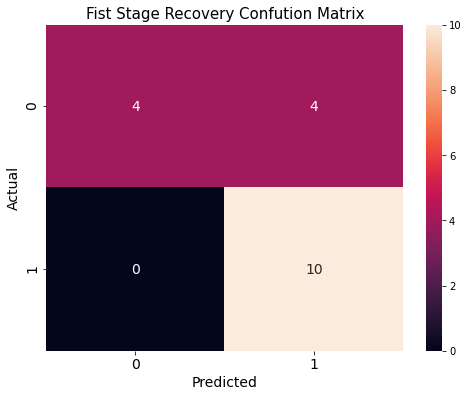

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.71      1.00      0.83        10

    accuracy                           0.78        18
   macro avg       0.86      0.75      0.75        18
weighted avg       0.84      0.78      0.76        18



In [76]:
# model = LR()
conf_mat = confusion_matrix(Y_test, knn_yhat)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 14}, fmt='d', xticklabels=[0,1], yticklabels=[0,1])
plt.title('Fist Stage Recovery Confution Matrix', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)
plt.show()
print (classification_report(Y_test, knn_yhat))

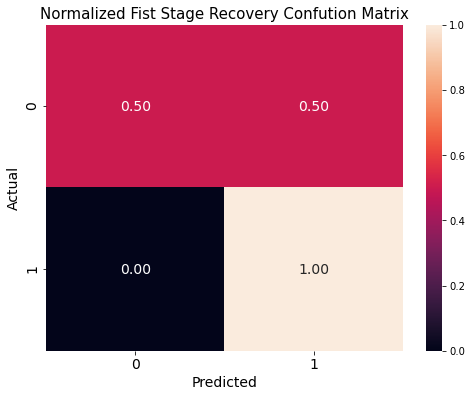

In [77]:
from sklearn.metrics import confusion_matrix
conf_sum = np.sum(conf_mat, axis=1, keepdims=True)
cm_perc = conf_mat / (conf_sum.astype(float))
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(cm_perc, annot=True, annot_kws={"size": 14}, fmt='.2f',
            xticklabels=[0,1], yticklabels=[0,1])
plt.title('Normalized Fist Stage Recovery Confution Matrix', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)
plt.show()
%matplotlib inline

In [61]:
LR_cv.fit(X_test,Y_test)
lr_best_grid = LR_cv.best_estimator_
lr_yhat = lr_best_grid.predict(X_test)
print('knn best parameters:',LR_cv.best_params_)
print('knn model accuracy:',accuracy_score(Y_test, lr_yhat))

knn best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
knn model accuracy: 0.9444444444444444


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
features=X_train
labels=Y_train
models = [
    SVC(C=31.622776601683793, gamma=1.0, kernel='sigmoid'),
    KNeighborsClassifier(n_neighbors=1,p=1),
    DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf= 4, min_samples_split=5, splitter='best'),
    LogisticRegression(C=0.1, penalty='l2', solver='lbfgs'),
]

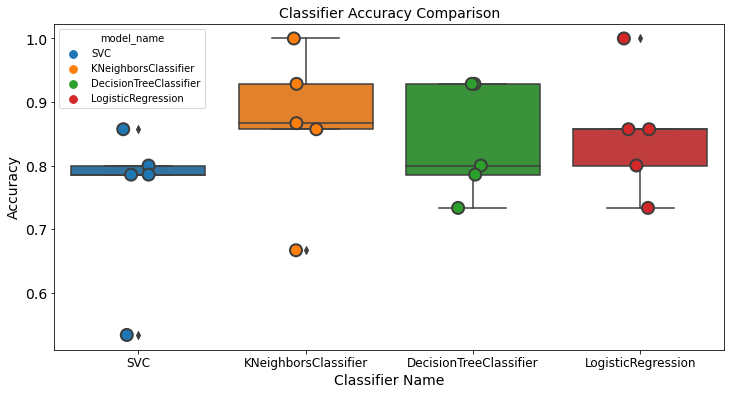

In [73]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
plt.figure(figsize=[12,6])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, hue='model_name',
              size=12, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Classifier Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Classifier Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.show()

In [74]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.835238
KNeighborsClassifier      0.863810
LogisticRegression        0.849524
SVC                       0.752381
Name: accuracy, dtype: float64

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By    | Change Description      |
| ----------------- | ------- | ------------- | ----------------------- |
| 2021-08-31        | 1.1     | Lakshmi Holla | Modified markdown       |
| 2020-09-20        | 1.0     | Joseph        | Modified Multiple Areas |


Copyright © 2020 IBM Corporation. All rights reserved.
